## Support vector machines (SVM) Basics (20 points)

#### Review data visualization materials in lecture 6 and related materials in lecture 7 and 8, and solve the following problems.

#### 1. Extract a new dataset that only contains ’setosa’, (0) and ’versicolor’ (1) samples and name it as Iris_binary_data.cvs (we call it iris binary data)

In [1]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.datasets import load_iris
import time
import seaborn as sb
import pandas as pd
from numpy import genfromtxt
import warnings

warnings.filterwarnings('ignore')

In [2]:

"""*Question 1*"""

iris = load_iris()
iris['target_names']

newData = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target_names'])
# print(newData)
newData = newData[newData.target_names!=2.0]
# print(newData)
newData.to_csv('iris_binary_data.csv',sep = ',', encoding = 'utf-8')


#### 2. Compare SVM classiﬁcation under four kernels : ’linear’, ’rbf’, ’poly’, ’sigmoid’ via a data visualization approach for iris binary data (2 dimensional data).

(a) Your data visualization should clearly mark the decision boundaries.

(b) You also need to draw a conclusion about the impacts of these kernels on the classiﬁcation results.

In [3]:
"""*Question 2(1)*"""

Iris = pd.read_csv("iris_binary_data.csv",None)
Iris.head()
training_data = Iris[['sepal length (cm)','sepal width (cm)']]
# print(training_data)
training_response = Iris[["target_names"]]
training_data = (training_data - training_data.mean()) / training_data.std()
#np.ndarray()
print(training_data.head())
print(training_response.head())

   sepal length (cm)  sepal width (cm)
0          -0.578153          0.852839
1          -0.889826         -0.197455
2          -1.201499          0.222662
3          -1.357336          0.012604
4          -0.733990          1.062898
   target_names
0           0.0
1           0.0
2           0.0
3           0.0
4           0.0


[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 1. 1. 1.]
[0. 0. 0. ... 1. 1. 1.]


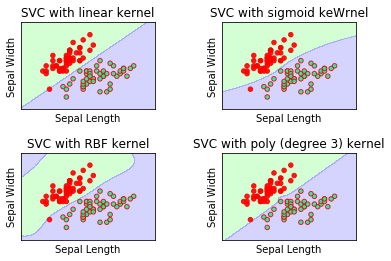

'*Linear kernels are best to apply on linearly separable data. Nonlinear kernels: ‘rbf’, ‘poly’, ‘‘sigmoid’ kernel are good work for linearly unseparable data, and RBF is work for most data and it could make data to high dimension. In this case, the RBF would do better in this classification problem.*'

In [10]:



clf = svm.SVC(kernel="sigmoid",gamma=0.5)
clf.fit(training_data,training_response)
predicted_label = clf.predict(training_data)
predicted_label

def meshgrid_build(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, classifier, xx, yy, **params):
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    print(Z)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
  
models = (svm.SVC(kernel='linear', C=1.0),
          svm.SVC(kernel="sigmoid",gamma=0.5),
          svm.SVC(kernel='rbf', gamma=0.5, C=1.0),
          svm.SVC(kernel='poly', degree=3, C=1.0))

models = (classifier.fit(training_data, training_response) for classifier in models)

# set color for plots
cmap_light = ListedColormap(['#AAFFAA', '#AAAAFF']) 
cmap_bold = ListedColormap(['#FF0000', '#00FFAA']) 

# set title for the plots

titles = ('SVC with linear kernel',
          'SVC with sigmoid keWrnel',
          'SVC with RBF kernel',
          'SVC with poly (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig,sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
training_data = np.array(training_data)
X0, X1 = training_data[:, 0], training_data[:, 1]
xx, yy = meshgrid_build(X0, X1)

# input data to plot
for classifier, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, classifier, xx, yy,cmap=cmap_light, alpha=0.5)
    training_response = np.array(training_response)
    ax.scatter(X0, X1, c=training_response.reshape(100), cmap=cmap_bold, s=20, edgecolors='red',alpha = 0.9)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Sepal Width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

"""*Linear kernels are best to apply on linearly separable data. Nonlinear kernels: ‘rbf’, ‘poly’, ‘‘sigmoid’ kernel are good work for linearly unseparable data, and RBF is work for most data and it could make data to high dimension. In this case, the RBF would do better in this classification problem.*"""




#### 3. Partition Iris binary data into training data that counts 55% of the total data and test data that counts 45% of the total data. Conduct SVM classiﬁcation under such a setting and compute the following classiﬁcation measures: accuracy, sensitivity, speciﬁcity, positive predictive ratios (PPR) and negative predictive ratios. (Note: you need to use all the four kernels)

In [11]:
"""*Question 3*"""


test_percent=0.45
x_train, x_test, y_train, y_test = train_test_split(training_data, training_response, test_size=test_percent, random_state=42)
print("\n training_data size:{:d}".format(len(training_data)))
N=10
print("\n The first **{:d}**".format(N)+"training samples and its labels\n")
print(str(training_data[0:N])+"\n")
print(str(training_response[0:N]))
def compute_measure(predicted_label, true_label):
    t_idx=(predicted_label==true_label)# truely predicted
    f_idx=np.logical_not(t_idx)# falsely predicted
    p_idx=(true_label>0)# positive targets
    n_idx=np.logical_not(p_idx)# negative targets
    # false positive: original negative but classified as positive
    # false negative: original positive but classified as negative
    tp=np.sum(np.logical_and(t_idx,p_idx))
    tn=np.sum(np.logical_and(t_idx,n_idx))
    fp=np.sum(n_idx)-tn
    fn=np.sum(p_idx)-tp
    tp_fp_tn_fn_list = []
    tp_fp_tn_fn_list.append(tp)
    tp_fp_tn_fn_list.append(fp)
    tp_fp_tn_fn_list.append(tn)
    tp_fp_tn_fn_list.append(fn)
    tp_fp_tn_fn_list = np.array(tp_fp_tn_fn_list)
    tp = tp_fp_tn_fn_list[0]
    fp = tp_fp_tn_fn_list[1]
    tn = tp_fp_tn_fn_list[2]
    fn = tp_fp_tn_fn_list[3]
    with np.errstate(divide='ignore'):
        sen = (1.0 * tp) / (tp + fn)
    with np.errstate(divide='ignore'):
        spc = (1.0 * tn) / (tn + fp)
    with np.errstate(divide='ignore'):
        ppr = (1.0 * tp) / (tp + fp)
    with np.errstate(divide='ignore'):
        npr = (1.0 * tn) / (tn + fn)
    acc = (tp + tn) * 1.0 / (tp + fp + tn + fn)
    ans = []
    ans.append(acc)
    ans.append(sen)
    ans.append(spc)
    ans.append(ppr)
    ans.append(npr)
    return ans

kernel_list=['linear','rbf','poly','sigmoid']
predicted_label={}
ans={}
support_vectors={}
for kernel in kernel_list:
    classifier=svm.SVC(kernel=kernel,tol=0.0001,gamma=0.5,C=1)
    classifier.fit(x_train,y_train)
    predicted_label[kernel]=str(classifier.predict(x_test))
    support_vectors[kernel]=classifier.support_vectors_
    ans[kernel]=compute_measure(classifier.predict(x_test),y_test)
print('\n check the following classification measures:accuracy,sen,spec,ppr,npr\n')
print("{}".format(ans))
time.sleep(2)
print("\nCheck the predicted labels under different kernels\n")
print(str(predicted_label))
time.sleep(2)
print("\nCheck the support vectors under different kernels...\n")
print(str(support_vectors))
time.sleep(2)




 training_data size:100

 The first **10**training samples and its labels

[[-0.57815327  0.85283898]
 [-0.8898262  -0.19745533]
 [-1.20149912  0.22266239]
 [-1.35733558  0.01260353]
 [-0.73398974  1.06289785]
 [-0.11064389  1.69307444]
 [-1.35733558  0.64278012]
 [-0.73398974  0.64278012]
 [-1.66900851 -0.40751419]
 [-0.8898262   0.01260353]]

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

 check the following classification measures:accuracy,sen,spec,ppr,npr

{'linear': [23.4, 18.0, 27.0, -0.8571428571428571, 1.7234042553191489], 'rbf': [23.4, 18.0, 27.0, -0.8571428571428571, 1.7234042553191489], 'poly': [23.2, 19.0, 26.0, -1.027027027027027, 1.8571428571428572], 'sigmoid': [23.4, 18.0, 27.0, -0.8571428571428571, 1.7234042553191489]}

Check the predicted labels under different kernels

{'linear': '[1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0.\n 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]', 'rbf': '[1. 1. 1. 0. 0. 0. 0. 1.

#### 4. Read 1.4.1.1. about Multi-class classiﬁcation at

(a) http://scikit-learn.org/stable/modules/svm.html#svm-classiﬁcation

(b) Conduct Multi-class classiﬁcation for the original iris data with four diﬀerent kernels respectively and compare their performance.

(c) You can choose to use “one-against-one” or ’one-vs-the-rest’ approaches in multi-class classiﬁcation

In [12]:
"""*Question 4*"""

def compute_measure(predicted_label, true_label):
    t_idx=(predicted_label==true_label)
    f_idx=np.logical_not(t_idx)
    p_idx=(true_label>0)
    n_idx=np.logical_not(p_idx)
    tp=np.sum(np.logical_and(t_idx,p_idx))
    tn=np.sum(np.logical_and(t_idx,n_idx))
    fp=np.sum(n_idx)-tn
    fn=np.sum(p_idx)-tp
    tp_fp_tn_fn_list = []
    tp_fp_tn_fn_list.append(tp)
    tp_fp_tn_fn_list.append(fp)
    tp_fp_tn_fn_list.append(tn)
    tp_fp_tn_fn_list.append(fn)
    tp_fp_tn_fn_list = np.array(tp_fp_tn_fn_list)
    tp = tp_fp_tn_fn_list[0]
    fp = tp_fp_tn_fn_list[1]
    tn = tp_fp_tn_fn_list[2]
    fn = tp_fp_tn_fn_list[3]
    with np.errstate(divide='ignore'):
        sen = (1.0 * tp) / (tp + fn)
    with np.errstate(divide='ignore'):
        spc = (1.0 * tn) / (tn + fp)
    with np.errstate(divide='ignore'):
        ppr = (1.0 * tp) / (tp + fp)
    with np.errstate(divide='ignore'):
        npr = (1.0 * tn) / (tn + fn)
    acc = (tp + tn) * 1.0 / (tp + fp + tn + fn)
    ans = []
    ans.append(acc)
    ans.append(sen)
    ans.append(spc)
    ans.append(ppr)
    ans.append(npr)
    return ans

"""*“one-against-one” *"""

kernel_list=['linear','rbf','poly','sigmoid']
predicted_label={}
ans={}
support_vectors={}
for kernel in kernel_list:
    classifier=svm.SVC(kernel=kernel,tol=0.0001,gamma=0.5,C=1,decision_function_shape='ovo')
    classifier.fit(x_train,y_train)
    predicted_label[kernel]=str(classifier.predict(x_test))
    support_vectors[kernel]=classifier.support_vectors_
    ans[kernel]=compute_measure(classifier.predict(x_test),y_test)
print('\n check the following classification measures:accuracy,sen,spec,ppr,npr\n')
print("{}".format(ans))
time.sleep(2)
print("\nCheck the predicted labels under different kernels\n")
print(str(predicted_label))
time.sleep(2)
print("\nCheck the support vectors under different kernels...\n")
print(str(support_vectors))
time.sleep(2)

"""*“one-vs-the-rest”*"""

predicted_label={}
ans={}
lin_clf = svm.LinearSVC()
lin_clf.fit(x_train,y_train)
predicted_label=str(classifier.predict(x_test))
ans=compute_measure(classifier.predict(x_test),y_test)
print('\n check the following classification measures:accuracy,sen,spec,ppr,npr\n')
print("{}".format(ans))
time.sleep(2)
print("\nCheck the predicted labels under one-vs-the-rest classification\n")
print(str(predicted_label))
time.sleep(2)


 check the following classification measures:accuracy,sen,spec,ppr,npr

{'linear': [23.4, 18.0, 27.0, -0.8571428571428571, 1.7234042553191489], 'rbf': [23.4, 18.0, 27.0, -0.8571428571428571, 1.7234042553191489], 'poly': [23.2, 19.0, 26.0, -1.027027027027027, 1.8571428571428572], 'sigmoid': [23.4, 18.0, 27.0, -0.8571428571428571, 1.7234042553191489]}

Check the predicted labels under different kernels

{'linear': '[1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0.\n 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]', 'rbf': '[1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0.\n 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]', 'poly': '[1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0.\n 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]', 'sigmoid': '[1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0.\n 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0

## Revisit Credit Risk Analytics (I) (30 points)

In [13]:
import time
from sklearn.neighbors import KNeighborsRegressor
kNN = KNeighborsRegressor(n_neighbors=5, weights='distance', 
                          algorithm='auto')


credit_risk_data = pd.read_csv("credit_risk_data_balanced.csv")
data = credit_risk_data[["Revolving Credit Percentage","Capital Reserves",
                         "Num Late 60","Debt Ratio","Monthly Income",
                         "Num Credit Lines","Num Late Past 90",
                         "Num Real Estate","Num Late 90","Num Employees"]]


label = credit_risk_data[["Delinquency"]]

kNN = KNeighborsRegressor(n_neighbors=5, weights='distance', 
                          algorithm='auto')

## Check dimension
print(" data dimension:" + str((data.shape)))

## Standard Data

data = (data - data.mean()) / data.std()

test_percent = 0.2 
def kNN_Credit_Risk(training_data, training_response):
    x_train, x_test, y_train, y_test = train_test_split(training_data, 
                                                    training_response, 
                                                    test_size=test_percent, 
                                                    random_state=42)

    kNN.fit(x_train, y_train)
    predicted_data = kNN.predict(x_test)

    ## Compare Result
    y_test["Estimate"]=predicted_data
    compare_result=(round(y_test['Estimate'])==round(y_test['Delinquency']))
    y_test["Result"]= compare_result
    y_test["Class"] = y_test["Result"].map({True:"good", False: 'bad'})
    print(y_test.head())
    return y_test

    


 data dimension:(16714, 10)


In [14]:
y_test= kNN_Credit_Risk(data,label)

       Delinquency  Estimate  Result Class
3485            -1 -0.677076    True  good
5500            -1  0.240518   False   bad
16712            1  0.258246   False   bad
9487             1 -0.242377   False   bad
16663            1  0.210552   False   bad


#### 2. Compute all six classiﬁcation measures and F1-measure

In [15]:

def Sample_Selection(dataframe):
    TrueTarget=dataframe.loc[dataframe["Result"] == True]
    FalseTarget=dataframe.loc[dataframe["Result"]==False]
    TPsamples=TrueTarget.loc[round(TrueTarget["Estimate"])== 1]
    TNsamples=TrueTarget.loc[round(TrueTarget["Estimate"])== -1]
    FPsamples=FalseTarget.loc[round(FalseTarget["Estimate"])== 1 ]
    FNsamples=FalseTarget.loc[round(FalseTarget["Estimate"])== -1 ]
    print("All TruePositive samples are:\n",TPsamples)
    print("All TrueNegative samples are:\n", TNsamples)
    print("All FalsePositive samples are:\n", FPsamples)
    print("All FalseNegative samples are:\n", FNsamples)
    

In [16]:
Sample_Selection(y_test.head(10))

All TruePositive samples are:
        Delinquency  Estimate  Result Class
15519            1       1.0    True  good
All TrueNegative samples are:
       Delinquency  Estimate  Result Class
3485           -1 -0.677076    True  good
All FalsePositive samples are:
 Empty DataFrame
Columns: [Delinquency, Estimate, Result, Class]
Index: []
All FalseNegative samples are:
 Empty DataFrame
Columns: [Delinquency, Estimate, Result, Class]
Index: []


### 3. Use sklearn to compute classiﬁcation measures

from sklearn import metrics 

metrics.classification_report( label, YOUR-classifier.predict(X_test)

In [17]:
from sklearn import metrics
def metrics_label(training_data, training_response):
    x_train, x_test, y_train, y_test = train_test_split(training_data, 
                                                    training_response, 
                                                    test_size=test_percent, 
                                                    random_state=42)

    kNN.fit(x_train, y_train)
    predicted_data = kNN.predict(x_test)
    print(metrics.classification_report(y_test, predicted_data.round()))

    
metrics_label(data,label)

             precision    recall  f1-score   support

       -1.0       0.69      0.44      0.54      1671
       -0.0       0.00      0.00      0.00         0
        1.0       0.76      0.31      0.44      1672

avg / total       0.72      0.37      0.49      3343



#### 4. Find all samples in ’TP’/’TN’/’FP’/’FN’ class

In [18]:
def compute_measure(predicted_label,true_label):
    t_idx=(predicted_label==true_label) # truely predicted
    f_idx=np.logical_not(t_idx)  #falsely predicted

    p_idx=(true_label==1) #Positive target
    n_idx=np.logical_not(p_idx)  #negative target
    tp=np.sum(np.logical_and(t_idx,p_idx)) #TP
    tn=np.sum(np.logical_and(t_idx,n_idx)) #TN
    fp=np.sum(n_idx)-tn
    fn=np.sum(p_idx)-tp
    tp_fp_tn_fn_list=[]
    tp_fp_tn_fn_list.append(tp)
    tp_fp_tn_fn_list.append(fp)
    tp_fp_tn_fn_list.append(tn)
    tp_fp_tn_fn_list.append(fn)
    tp_fp_tn_fn_list=np.array(tp_fp_tn_fn_list)
    tp=tp_fp_tn_fn_list[0]
    fp=tp_fp_tn_fn_list[1]
    tn=tp_fp_tn_fn_list[2]
    fn=tp_fp_tn_fn_list[3]
    with np.errstate(divide='ignore'):
        sen=(1.0*tp)/(tp+fn)

    with np.errstate(divide='ignore'):
        spc=(1.0*tn)/(tn+fp)

    with np.errstate(divide='ignore'):
        ppr=(1.0*tp)/(tp+fp)

    with np.errstate(divide='ignore'):
        npr=(1.0*tn)/(tn+fn)

    acc=(tp+tn)*1.0/(tp+fp+tn+fn)
    F1_score = 2*tp / (2*tp + fp + fn)
    ans=[]
    ans.append(acc)
    ans.append(sen)
    ans.append(spc)
    ans.append(ppr)
    ans.append(npr)
    ans.append(F1_score)
    print("\n check the following classication measures： accuracy, sen, spec,ppr,npr,F1_Score\n")
    print("{}".format(ans))


In [19]:
compute_measure(round(y_test["Estimate"]),y_test["Delinquency"])


 check the following classication measures： accuracy, sen, spec,ppr,npr,F1_Score

[0.37241998205204907, 0.305622009569378, 0.43925792938360264, 0.35290055248618785, 0.38733509234828495, 0.32756410256410257]


#### 5. Write your own k-NN to conduct this credit risk analytics (extra credits 20 points)

In [20]:
credit_risk_data = pd.read_csv("credit_risk_data_balanced.csv")
data = credit_risk_data[["Revolving Credit Percentage","Capital Reserves",
                         "Num Late 60","Debt Ratio","Monthly Income",
                         "Num Credit Lines","Num Late Past 90",
                         "Num Real Estate","Num Late 90","Num Employees"]]


## Standard Data
label = credit_risk_data[["Delinquency"]]
data = (data - data.mean()) / data.std()



def KNNClassify(training_data, training_response,k,test_percent):
    
    x_train, x_test, y_train, y_test = train_test_split(training_data, 
                                                    training_response, 
                                                    test_size=test_percent, 
                                                    random_state=42)
    
    
    numSamples=x_train.shape[0]
    diff=x_test - x_train
    squaredist=diff**2
    distance = (squaredist.sum(axis=1))**0.5 

    
    sortedDistIndex = np.argsort(distance)

    ## Not Completed
    

KNNClassify(data,label,10,0.5)

## Credit Risk Analytics (III) (30 points)


• We have the following data set for credit ranking for 12 diﬀerent industry sections (it is a simulated data):

– credit_data_.csv, where the ﬁrst 1540 samples (rows) are labeled as ’good credit’ (label type: ’1’ ), i.e., whose credit rankings are ’AAA’, ’AA’, or ’A’

– and the remaining 130 samples are labeled as ’ bad credit’, (label type: ’0’) whose credit ranks are ’CCC’.

In [21]:

import time
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import svm

df = pd.read_csv('credit_data_.csv')
df.columns=['WC_TA','RE_TA','EBIT_TA','MVE_BVTD','S_TA','credit_labels']

print(df.head())
data=df.loc[:,:]
label=df['credit_labels']
kernel_list=['linear', 'rbf', 'poly', 'sigmoid']
for kernel in kernel_list:
    # kernel='rbf';
    clf = svm.SVC(kernel=kernel, gamma=0.5, C=1)
    k=10 # total folders
    scores = cross_val_score(clf, data, label, cv=k)
    print("\n k={:d}".format(k) + " fold cross validation\n")
    print("SVM classification under kernel ** " + str(kernel) + " ** is:\n\n" + str(scores))
    
data = (data - data.mean()) / data.std()
training_data, test_data, training_data_label, test_data_label =train_test_split(data,label, test_size=0.2,random_state=42)

kernel_list=['linear', 'rbf', 'poly', 'sigmoid']
predicted_label = {}
support_vectors = {}
for kernel in kernel_list:
    clf = svm.SVR(kernel=kernel, tol=0.0001, gamma=0.5)
    clf.fit(training_data, training_data_label)
    predicted_label[kernel]=str(clf.predict(test_data))
    support_vectors[kernel]=clf.support_vectors_

print(" \nCheck the support vectors under different kernels...\n")
print(str(support_vectors))
time.sleep(2)

   WC_TA  RE_TA  EBIT_TA  MVE_BVTD   S_TA  credit_labels
0  0.470  0.752    0.070    11.596  1.120              8
1  0.110  0.337    0.045     3.835  0.812              4
2  0.511  0.869    0.106     8.538  0.732              2
3  0.202  0.460    0.064     3.685  0.682              4
4  0.399  0.506    0.096     3.393  0.477              3

 k=10 fold cross validation

SVM classification under kernel ** linear ** is:

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

 k=10 fold cross validation

SVM classification under kernel ** rbf ** is:

[0.9122807  0.9408284  0.89940828 0.97633136 0.99404762 1.
 1.         1.         1.         0.67901235]

 k=10 fold cross validation

SVM classification under kernel ** poly ** is:

[0.99415205 1.         0.98816568 0.99408284 0.99404762 1.
 1.         1.         1.         0.98765432]

 k=10 fold cross validation

SVM classification under kernel ** sigmoid ** is:

[0.0994152  0.09467456 0.09467456 0.09467456 0.0952381  0.09580838
 0.09580838 0.09756098 0.09815951